![example](images/director_shot.jpeg)

# A genre study - or - most pupolar and most profitable

**Author:** Maria Kuzmin
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

first let me open all the files to get a sense of what I have and make them all into data frames
since I also want to make sure that all the files have info about the same movies (I am kind of assuming so...)

## BOM

In [170]:
#df_bom=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
#df_bom.head(10)

## Rotten Tomatoes

In [3]:
#probably will not need this.
#df_rn_movieinfo=pd.read_csv('zippedData/rt.movie_info.tsv.gz',delimiter='\t')

In [4]:
#df_rn_reviews=pd.read_csv('zippedData/rt.reviews.tsv.gz',delimiter='\t',encoding='latin-1')
#I was getting an error with the utf-8 encoding so I trie with latin-1 and in this way it works

## TMDB
**The movie Database**

In [5]:
df_tmdb=pd.read_csv('zippedData/tmdb.movies.csv.gz')
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## The Numbers
**Movie budgets**

In [6]:
df_tn=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_tn.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


## IMDB
This is actually a SQL database so I need to first unzip it and then I can start to query with sqlite3

In [7]:
#unzipping the file
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

In [8]:
import sqlite3

Creating a connection and starting to look at the schema to get a sense of which are the tables in this database."

In [9]:
conn=sqlite3.connect("zippedData/im.db")#exploring this database
schema_df=pd.read_sql("""
SELECT *
FROM sqlite_master
;
""",conn)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


Now I'm going to create a Dataframe for each table that I am going to use

In [172]:
df_IMDB_moviebasics=pd.read_sql("""
SELECT *
FROM movie_basics
;
""",conn)
#df_IMDB_moviebasics

In [11]:
df_IMDB_ratings=pd.read_sql("""
SELECT *
FROM movie_ratings
;
""",conn)
df_IMDB_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [12]:
knownfor_df=pd.read_sql("""
SELECT *
FROM movie_basics
JOIN known_for
    USING (movie_id)
;
""",conn)

In [13]:
directors_df=pd.read_sql("""
SELECT *
FROM directors

;
""",conn)

In [14]:
writers_df=pd.read_sql("""
SELECT *
FROM writers
;
""",conn)

In [15]:
persons_df=pd.read_sql("""
SELECT *
FROM persons
;
""",conn)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [16]:
# Here you run your code to clean the data


I am going to conduct a study about the movies gross and budget, and I will do so by working on the dataframe from "the Numbers". I will need to subtract the budget from the gross income, but I need to make sure that the files are the right type to do that.

In [17]:
type(df_tn['domestic_gross'][0])

str

In [18]:
type(df_tn['production_budget'][0])

str

Since the types of the columns that I need to compute are strings I need to first convert that to floats.

In [19]:
df_tn['domestic_gross']=df_tn['domestic_gross'].str.strip('$')
df_tn['production_budget']=df_tn['production_budget'].str.strip('$')
df_tn['worldwide_gross']=df_tn['worldwide_gross'].str.strip('$');


In [20]:
df_tn['domestic_gross']=(df_tn['domestic_gross']).str.replace(",","")
df_tn['worldwide_gross']=(df_tn['worldwide_gross']).str.replace(",","")
df_tn['production_budget']=(df_tn['production_budget']).str.replace(",","")

In [21]:
df_tn['domestic_gross']=df_tn['domestic_gross'].apply(float)
df_tn['worldwide_gross']=(df_tn['worldwide_gross']).apply(float)
df_tn['production_budget']=(df_tn['production_budget']).apply(float)

In [22]:
#df_tn=df_tn.rename(columns={'domestic_gross':'domestic_gross_$','worldwide_gross':'worldwide_gross_$','production_budget':'production_budget_$'})

Now that I converted to floats I can calculate the domestic and worldwide net, subtracting the budget from the incomes.
I am also renaming the columns so that the 

In [23]:
#df_tn['domestic_net$']=df_tn['domestic_gross_$']-df_tn['production_budget_$']
#df_tn['worldwide_net$']=df_tn['worldwide_gross_$']-df_tn['production_budget_$']
df_tn['domestic_net']=df_tn['domestic_gross']-df_tn['production_budget']
df_tn['worldwide_net']=df_tn['worldwide_gross']-df_tn['production_budget']

In [24]:
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08


Now getting my IMDB Dataframe with movie basics and ratings, since I want to study the genre and the reviews.

In [25]:
df_IMDB=pd.read_sql("""
SELECT movie_id, primary_title, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)
;
""",conn)
df_IMDB.head()

,movie_id,primary_title,genres,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5,119


Next I want to merge the two dataframes, to do so I need to rename the columns

In [26]:
df_IMDB=df_IMDB.rename(columns={'primary_title':'movie'})
#df_bom=df_bom.rename(columns={'title':'movie'})

In [27]:
main_df=pd.merge(df_tn, df_IMDB,on='movie',how='inner')
main_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,movie_id,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09,tt1775309,Horror,6.1,43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08,tt1298650,"Action,Adventure,Fantasy",6.6,447624
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08,tt6565702,"Action,Adventure,Sci-Fi",6.0,24451
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09,tt2395427,"Action,Adventure,Sci-Fi",7.3,665594
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,378815482.0,1.748134e+09,tt4154756,"Action,Adventure,Sci-Fi",8.5,670926


Let us check what is the size of our final DataFrame to get a sense of how many values we are working with.

In [28]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2875 entries, 0 to 2874
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2875 non-null   int64  
 1   release_date       2875 non-null   object 
 2   movie              2875 non-null   object 
 3   production_budget  2875 non-null   float64
 4   domestic_gross     2875 non-null   float64
 5   worldwide_gross    2875 non-null   float64
 6   domestic_net       2875 non-null   float64
 7   worldwide_net      2875 non-null   float64
 8   movie_id           2875 non-null   object 
 9   genres             2867 non-null   object 
 10  averagerating      2875 non-null   float64
 11  numvotes           2875 non-null   int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 292.0+ KB


In order to continue with my analysis I need to decide what to do with NaN values that could create problems.
First I am going to check how many there are, to then decide how to proceed with data cleaning.

In [29]:
main_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
domestic_net         0
worldwide_net        0
movie_id             0
genres               8
averagerating        0
numvotes             0
dtype: int64

Since there are only 8 null values given the size of the file it is appropriate to simply drop those values.

In [30]:
main_df=main_df.dropna();

In [31]:
#main_df.info()

In [32]:
main_df['genres'].value_counts()

Drama                      319
Documentary                126
Comedy                     108
Comedy,Drama                93
Drama,Romance               77
                          ... 
Drama,Family,Thriller        1
Action,Romance,Sport         1
Documentary,History,War      1
Biography,Family,Sport       1
Adventure,Drama,Western      1
Name: genres, Length: 311, dtype: int64

The problem we have here is that many movies have listed more then one gerne.
That makes it complicated to group by genre and draw conclusions on a specific genre because with this format "Comedy,Drama" results as ist own genre, instead of being listed as a movie that pertains to both genres.

To be able to continue in my study I am going to have to separate all those gernes, and have a new data frame in which every listed movie has only one corrsponding genre (and movies with two listed genres will appear twice etc).
The first step is to separate the string of the genre into a list with the separate genres, and I do think by creating a function:

In [33]:
def Convert(string):
    li = list(string.split(","))
    return li

And then applying that function to the genre column of the dataframe

In [34]:
main_df['genres']=main_df['genres'].map(Convert)

In [35]:
type(main_df['genres'][1])

list

Now I can use the pandas method .explode( ) {find out how to write it in code} that can separate the different entries for "genre" for a single movie, by creating copies of the same row each with a single genre.

In [36]:
main_df=main_df.explode('genres')

In [37]:
main_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,movie_id,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09,tt1775309,Horror,6.1,43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08,tt1298650,Action,6.6,447624
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08,tt1298650,Adventure,6.6,447624
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08,tt1298650,Fantasy,6.6,447624
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08,tt6565702,Action,6.0,24451


And now I have my dataframe ready to work with!

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

Now I need to study... Lets start from gross income vs genre

In [38]:
# Here you run your code to model the data
average_df=main_df.groupby('genres').mean()
average_df.head()

,id,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,averagerating,numvotes
genres,,,,,,,,
Action,49.833333,6.472846e+07,7.093171e+07,1.904540e+08,6.203254e+06,1.257256e+08,6.103810,135457.123810
Adventure,49.015625,9.131197e+07,1.070627e+08,2.999950e+08,1.575069e+07,2.086830e+08,6.400893,168058.022321
Animation,46.846154,8.590607e+07,1.158421e+08,3.176463e+08,2.993601e+07,2.317402e+08,6.482308,99923.807692
Biography,52.215385,2.545666e+07,3.469678e+07,7.231284e+07,9.240125e+06,4.685618e+07,6.971795,80511.994872
Comedy,51.269129,3.342504e+07,4.760250e+07,1.061395e+08,1.417746e+07,7.271444e+07,6.186280,66854.522427


In [39]:
plt.style.use('seaborn')

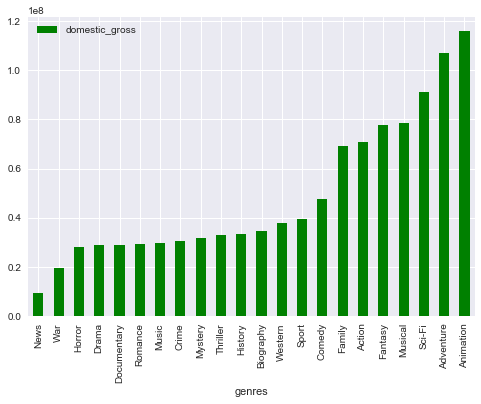

In [40]:
average_df=average_df.sort_values(by=['domestic_gross'])
average_df.plot.bar(y='domestic_gross',color='green');

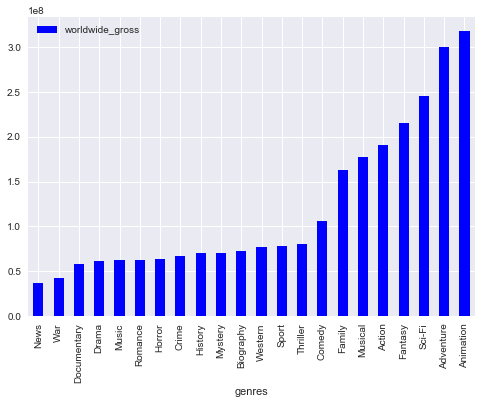

In [41]:
average_df=average_df.sort_values(by=['worldwide_gross'])
average_df.plot.bar(y='worldwide_gross',color='blue');

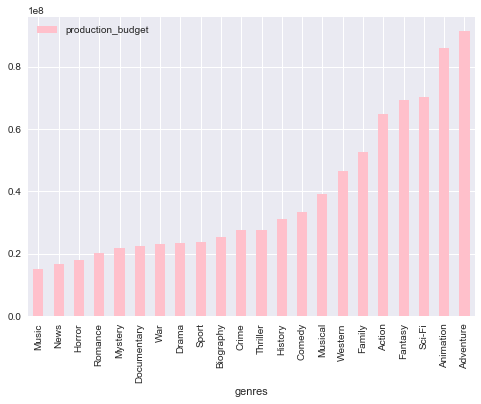

In [42]:
average_df=average_df.sort_values(by=['production_budget'])
average_df.plot.bar(y='production_budget',color='pink');

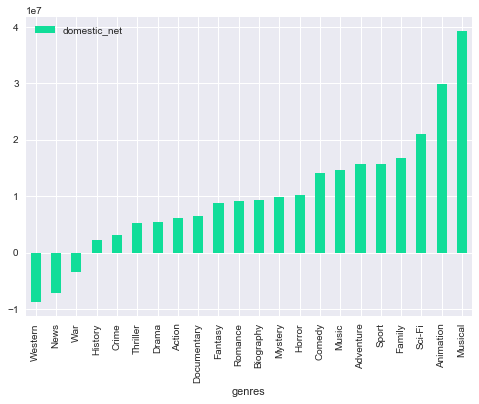

In [43]:
average_df=average_df.sort_values(by=['domestic_net'])
average_df.plot.bar(y='domestic_net',color='#11dd99');

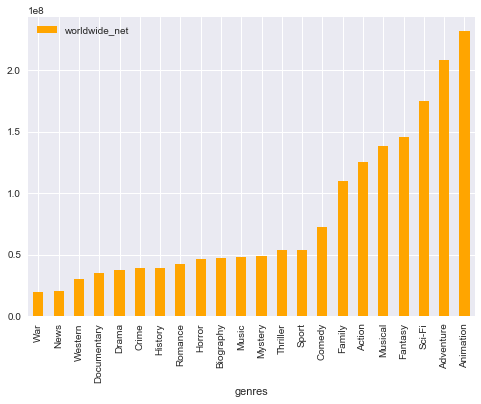

In [44]:
average_df=average_df.sort_values(by=['worldwide_net'])
average_df.plot.bar(y='worldwide_net',color='orange');

### ROI
Which is a perfmromance measure to evaluate the efficiency or profitability of an investment.

In [45]:
average_df['ROI']=(average_df['worldwide_gross']-average_df['production_budget'])/average_df['production_budget']
roi_df=average_df.sort_values(by='ROI')

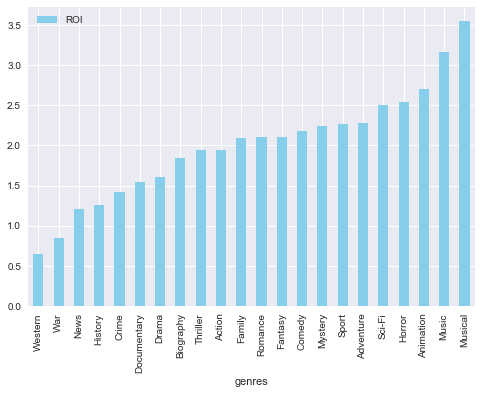

In [46]:
roi_df.plot.bar(y='ROI',color='skyblue');

We discovered that the top 5 genres with higest gross income are Musical, Animation, Horror, Sci-Fi and Adventure.
Let us make a smaller DataFrame only with these 5 categories to be able to analize these 5 genres a little more in depth.

In [47]:
#top5_df=domgross_df.iloc[17:22,]
#top5_df.reset_index()

In [159]:
animation_df=main_df.loc[main_df['genres']=='Animation']
adventure_df=main_df.loc[main_df['genres']=='Adventure']
scifi_df=main_df.loc[main_df['genres']=='Sci-Fi']
musical_df=main_df.loc[main_df['genres']=='Musical']
horror_df=main_df.loc[main_df['genres']=='Horror']

In [49]:
top5_list=[animation_df,adventure_df, scifi_df, musical_df,horror_df]
top5_df=pd.concat(top5_list)

In [50]:
import seaborn as sns

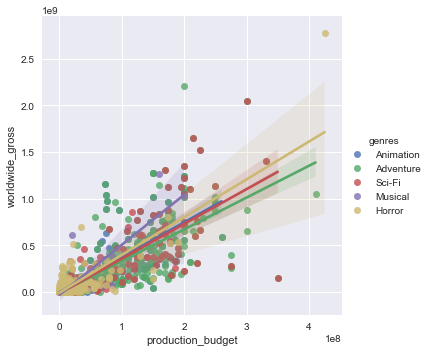

In [63]:
sns.lmplot(x="production_budget", y="worldwide_gross", hue="genres", data=top5_df);

In [144]:
#horror_df.sort_values(by='domestic_gross',ascending=False)

In [52]:
avgrev_df=average_df.sort_values(by=['averagerating'])

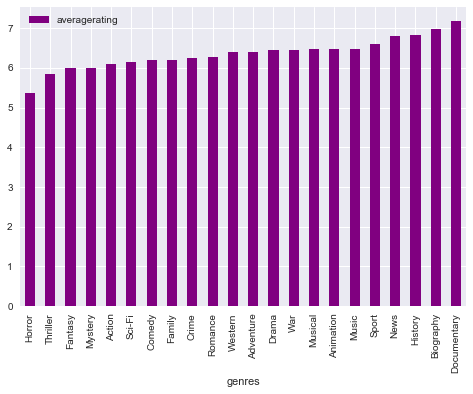

In [53]:
avgrev_df.plot.bar(y='averagerating',color='purple');

### SOOOOOO what makes a movie profitable???

Let us study other things that could be connected to a movie being profitable, like number of people that it is know for, as well as maybe specific directors or writers. To use this we retrieve some dataframes that we created before.

In [129]:
#knownfor_df

In [55]:
first_df=pd.merge(top5_df, knownfor_df, on='movie_id',how='inner')
people_df=pd.merge(first_df, persons_df, on='person_id', how='inner')

In [56]:
people_df=people_df.drop(columns=['production_budget', 'domestic_gross','domestic_net','worldwide_net','start_year','primary_title','original_title','runtime_minutes','genres_y','death_year'])

In [143]:
people_df.head()

,id,release_date,movie,worldwide_gross,movie_id,genres_x,averagerating,numvotes,person_id,primary_name,birth_year,primary_profession
0,15,"Nov 24, 2010",Tangled,586477240.0,tt0398286,Animation,7.8,366366,nm0004951,Brad Garrett,1960.0,"actor,producer,music_department"
1,15,"Nov 24, 2010",Tangled,586477240.0,tt0398286,Adventure,7.8,366366,nm0004951,Brad Garrett,1960.0,"actor,producer,music_department"
2,43,"Aug 3, 2018",Christopher Robin,197504758.0,tt4575576,Animation,7.3,52737,nm0004951,Brad Garrett,1960.0,"actor,producer,music_department"
3,43,"Aug 3, 2018",Christopher Robin,197504758.0,tt4575576,Adventure,7.3,52737,nm0004951,Brad Garrett,1960.0,"actor,producer,music_department"
4,15,"Nov 24, 2010",Tangled,586477240.0,tt0398286,Animation,7.8,366366,nm0006670,Paul F. Tompkins,1968.0,"actor,writer,producer"


In [58]:
#table=pd.pivot_table(people_df,index=['movie','primary_name'])
#table[0:50]

In [59]:
counting=people_df.groupby('movie').count()

In [66]:
counting=counting.reset_index()

In [67]:
famous_counts= pd.DataFrame().assign(movie=counting['movie'],counts=counting['id'])

In [68]:
famous_counts

,movie,counts
0,#Horror,14
1,10 Cloverfield Lane,25
2,127 Hours,47
3,13 Sins,23
4,21,6
...,...,...
840,Zambezia,24
841,Zombie Hunter,9
842,Zoom,5
843,Zootopia,60


In [130]:
top5_fam=famous_counts.merge(top5_df,on='movie',how='inner')

In [131]:
top5_fam=top5_fam.sort_values(by='counts')
#new_pd[450:500]

In [132]:
#test=new_pd.sort_values(by='worldwide_gross',ascending=False)

In [81]:
#test[0:50]

In [148]:
#top5_fam.plot.bar(x='counts',y='worldwide_gross',color='green');

In [149]:
#top5_fam.plot.bar(x='counts',y='production_budget',color='blue');

In [88]:
#new_pd.plot.bar(x='counts',y='averagerating',color='green') FOGGEDABAOUTIT

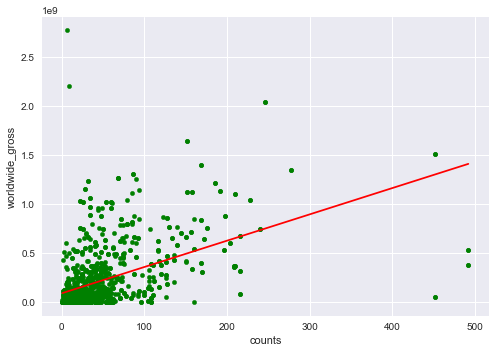

In [147]:
top5_fam.plot.scatter(x='counts',y='worldwide_gross',color='green')
plt.plot(np.unique(top5_fam['counts']), np.poly1d(np.polyfit(top5_fam['counts'], top5_fam['worldwide_gross'], 1))(np.unique(top5_fam['counts'])), color='red');

In [ ]:
#code for correlation from https://dev.to/shanelee/how-to-plot-a-correlation-with-python-python-for-statistics-5ef

In [137]:
correlation_matrix = np.corrcoef(top5_fam['counts'], top5_fam['worldwide_gross'])
correlation_matrix[0][1]

0.4858641555475707

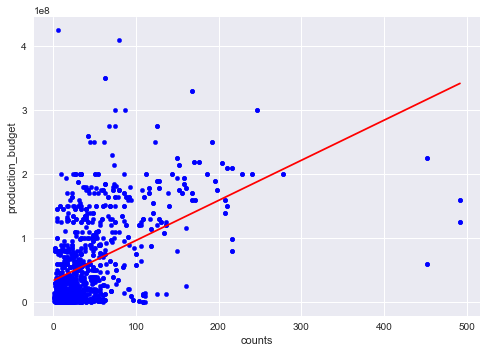

In [146]:
top5_fam.plot.scatter(x='counts',y='production_budget',color='blue')
plt.plot(np.unique(top5_fam['counts']), np.poly1d(np.polyfit(top5_fam['counts'], top5_fam['production_budget'], 1))(np.unique(top5_fam['counts'])), color='red');

In [151]:
#this plots only the line lol
#plt.plot(np.unique(top5_fam['counts']), np.poly1d(np.polyfit(top5_fam['counts'], top5_fam['production_budget'], 1))(np.unique(top5_fam['counts'])), color='yellow')

In [139]:
correlation_matrix = np.corrcoef(top5_fam['counts'], top5_fam['production_budget'])
correlation_matrix[0][1]

0.5143743839747885

In [92]:
#new_pd.plot(x='counts',y='production_budget',color='blue');

Let me try to ger rid of the outliers for this one. NOPE!!! CORRELATION IS BETTER KEEPING THE OUTLIERS. BUT LETS DO IT
FOR ANOTHER MEASURE IF WE WANT

In [108]:
Q3=np.percentile(new_pd['counts'],75)
Q3

55.0

In [109]:
Q1=np.percentile(new_pd['counts'],25)
Q1

14.0

In [110]:
IQR=new_pd

In [113]:
IQR.drop(IQR.index[IQR['counts']>Q3], inplace=True)
IQR.drop(IQR.index[IQR['counts']<Q1], inplace=True)
IQR

,movie,counts,id,release_date,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,movie_id,genres,averagerating,numvotes
863,The Ghastly Love of Johnny X,14,74,"Oct 26, 2012",2000000.0,2436.0,2436.0,-1997564.0,-1997564.0,tt1754633,Musical,5.7,386
978,The Return,14,43,"Feb 6, 2004",15000000.0,501752.0,5953886.0,-14498248.0,-9046114.0,tt4665626,Adventure,8.2,32
960,The Perfect Guy,14,78,"Sep 11, 2015",18000000.0,57027435.0,60278166.0,39027435.0,42278166.0,tt3862750,Horror,5.6,8998
198,Despicable Me,14,50,"Jul 9, 2010",69000000.0,251513985.0,543464573.0,182513985.0,474464573.0,tt1323594,Animation,7.7,464511
207,Devil,14,71,"Sep 17, 2010",10000000.0,33679655.0,63354114.0,23679655.0,53354114.0,tt1314655,Horror,6.2,122080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,The Three Musketeers,55,77,"Oct 21, 2011",90000000.0,20377913.0,139877913.0,-69622087.0,49877913.0,tt1509767,Adventure,5.8,98408
663,Rock of Ages,55,29,"Jun 15, 2012",70000000.0,38518613.0,61031932.0,-31481387.0,-8968068.0,tt1336608,Musical,5.9,69910
1012,The Three Musketeers,55,77,"Oct 21, 2011",90000000.0,20377913.0,139877913.0,-69622087.0,49877913.0,tt3274666,Adventure,3.7,213
585,Pixels,55,59,"Jul 24, 2015",90000000.0,78765986.0,244041804.0,-11234014.0,154041804.0,tt2120120,Sci-Fi,5.6,119789


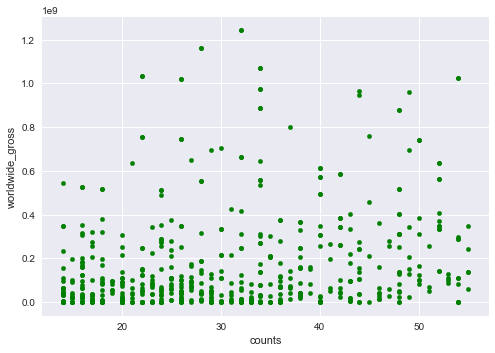

In [118]:
IQR.plot.scatter(x='counts',y='worldwide_gross',color='green');

In [140]:
#Covariance
# NumPy calculates cov(height, height), cov(height, weight), cov(weight, height), and cov(weight, weight)
# We only need height vs. weight so we extract just that value
#covariance_matrix = np.cov(IQR['counts'], IQR['worldwide_gross'])
#covariance_matrix#[0][1]
#Correlation
# Same as covariance, NumPy returns a matrix but we only need one value
correlation_matrix = np.corrcoef(IQR['counts'], IQR['worldwide_gross'])
correlation_matrix[0][1]

0.23150921157782192

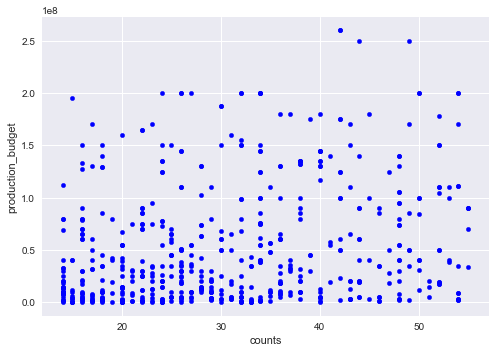

In [141]:
IQR.plot.scatter(x='counts',y='production_budget',color='blue');

In [142]:
correlation_matrix = np.corrcoef(IQR['counts'], IQR['production_budget'])
correlation_matrix[0][1]

0.2560785144444093

Given that there is such a positive correlation we feel it would be useful to provide miscosoft with a list of the 10 best writers and directors for each genre, so that Microsoft could consider starting with those.

In [152]:
animation_df=animation_df.sort_values(by='worldwide_gross',ascending=False)
adventure_df=main_df.sort_values(by='worldwide_gross',ascending=False)
scifi_df=main_df.sort_values(by='worldwide_gross',ascending=False)
musical_df=main_df.sort_values(by='worldwide_gross',ascending=False)
horror_df=main_df.sort_values(by='worldwide_gross',ascending=False)

In [161]:
animation_df=pd.merge(animation_df, directors_df, on='movie_id',how='inner')
animation_df=pd.merge(animation_df, persons_df, on='person_id',how='inner')
animation_df=animation_df.rename(columns={'primary_name':'director'})
animation_df=pd.merge(animation_df, writers_df, on='movie_id',how='inner')
animation_df=pd.merge(animation_df, persons_df, on='person_id',how='inner')
animation_df=animation_df.rename(columns={'primary_name':'writer'})
animation_df

KeyError: 'person_id'

In [157]:
animation_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,movie_id,genres,averagerating,numvotes,person_id_x,primary_name,birth_year,death_year,primary_profession,person_id_y
0,56,"Nov 22, 2013",Frozen,150000000.0,400738009.0,1.272470e+09,250738009.0,1.122470e+09,tt2294629,Animation,7.5,516998,nm0118333,Chris Buck,1958.0,NaN,"animation_department,director,writer",nm0118333
1,56,"Nov 22, 2013",Frozen,150000000.0,400738009.0,1.272470e+09,250738009.0,1.122470e+09,tt2294629,Animation,7.5,516998,nm0118333,Chris Buck,1958.0,NaN,"animation_department,director,writer",nm1601644
2,56,"Nov 22, 2013",Frozen,150000000.0,400738009.0,1.272470e+09,250738009.0,1.122470e+09,tt2294629,Animation,7.5,516998,nm0118333,Chris Buck,1958.0,NaN,"animation_department,director,writer",nm0118333
3,56,"Nov 22, 2013",Frozen,150000000.0,400738009.0,1.272470e+09,250738009.0,1.122470e+09,tt2294629,Animation,7.5,516998,nm0118333,Chris Buck,1958.0,NaN,"animation_department,director,writer",nm1601644
4,56,"Nov 22, 2013",Frozen,150000000.0,400738009.0,1.272470e+09,250738009.0,1.122470e+09,tt2294629,Animation,7.5,516998,nm0118333,Chris Buck,1958.0,NaN,"animation_department,director,writer",nm0118333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9331,12,"Jun 3, 2011",The Lion of Judah,1500000.0,0.0,0.000000e+00,-1500000.0,-1.500000e+06,tt1212022,Animation,3.8,511,nm1776878,Roger Hawkins,NaN,NaN,"director,actor,writer",nm1776878
9332,12,"Jun 3, 2011",The Lion of Judah,1500000.0,0.0,0.000000e+00,-1500000.0,-1.500000e+06,tt1212022,Animation,3.8,511,nm1776878,Roger Hawkins,NaN,NaN,"director,actor,writer",nm2968466
9333,12,"Jun 3, 2011",The Lion of Judah,1500000.0,0.0,0.000000e+00,-1500000.0,-1.500000e+06,tt1212022,Animation,3.8,511,nm1776878,Roger Hawkins,NaN,NaN,"director,actor,writer",nm1776878
9334,12,"Jun 3, 2011",The Lion of Judah,1500000.0,0.0,0.000000e+00,-1500000.0,-1.500000e+06,tt1212022,Animation,3.8,511,nm1776878,Roger Hawkins,NaN,NaN,"director,actor,writer",nm2968466


### Top 10 Animation Directors and Writers

In [155]:
animation_df['directors','writers']

KeyError: ('directors', 'writers')

I have to find a smarter way to do this. But the point is I can correlate the number of known people to the gross income. And then I can provide a list of famous writers and directors, and maybe see a comparison in gross income between a known director and writer and an unknown one.

## When to release
The last piece of advice that I am going to offer is about when is the best time of the year to release a movie, and once again we are going to evaluate that based on the gross income for the movies.

The only file that contains the release date is the one from The Movie Database so I'm going to pull that one up

In [165]:
df_tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [166]:
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,-7000.0,-7.000000e+03
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05,42482.0,2.344950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3662.0,-3.662000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00,-1400.0,-1.400000e+03


In [243]:
release_df=pd.merge(df_tn,df_tmdb,left_on='movie',right_on='title',how='inner')
release_df.head()

,id_x,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,Unnamed: 0,genre_ids,id_y,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
2,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09,14169,"[28, 12, 878]",99861,en,Avengers: Age of Ultron,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,378815482.0,1.748134e+09,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
4,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,-70975705.0,3.559452e+08,20623,"[28, 12, 14, 878]",141052,en,Justice League,34.953,2017-11-17,Justice League,6.2,7510


In [244]:
release_df.drop(columns=['Unnamed: 0','genre_ids','id_y','original_language','release_date_y','title'],inplace=True)

In [221]:
#release_df['month'] = pd.DatetimeIndex(release_df['release_date_x']).month

In [245]:
release_df['month'] = pd.DatetimeIndex(release_df['release_date_x']).month
release_df=release_df.groupby('month').mean()
release_df.reset_index(inplace=True)
release_df.sort_values(by='month',inplace=True)
import calendar
release_df['month'] = release_df['month'].apply(lambda x: calendar.month_abbr[x])

In [222]:
#release_df=release_df.groupby('month').mean()
#release_df.reset_index(inplace=True)

In [223]:
#release_df.sort_values(by='month',inplace=True)

In [224]:
#import calendar
#release_df['month'] = release_df['month'].apply(lambda x: calendar.month_abbr[x])

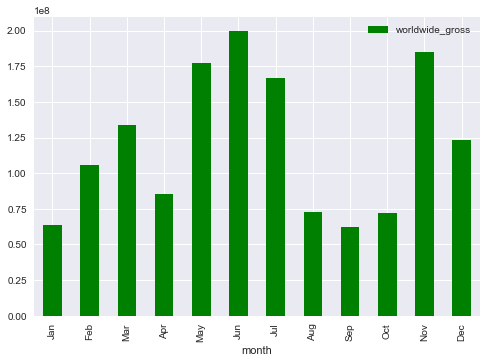

In [246]:
release_df.plot.bar(x='month',y='worldwide_gross',color='green');

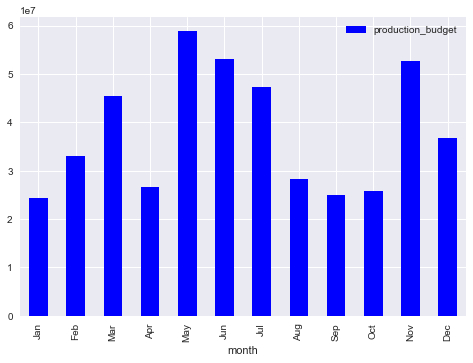

In [247]:
release_df.plot.bar(x='month',y='production_budget',color='blue');

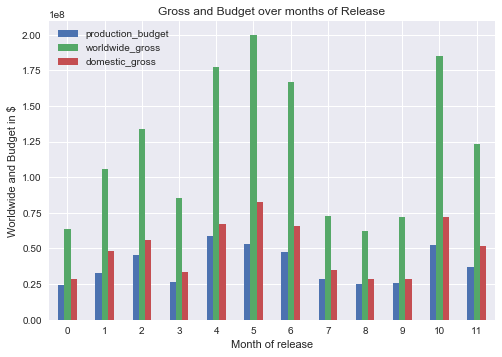

In [258]:
### Need to fix the X axis ticks

#index=['January','February','March','April','May','June','July','August','September','October','November','December']
df=pd.DataFrame({'production_budget': release_df['production_budget'],
                 'worldwide_gross': release_df['worldwide_gross'],'domestic_gross':release_df['domestic_gross']
                }, index=release_df.index)
ax=df.plot.bar(rot=0)
ax.set_title('Gross and Budget over months of Release')
ax.set_xlabel('Month of release')
ax.set_ylabel('Worldwide and Budget in $');

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***